## Manga Analysis

In [1]:
import pandas as pd 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import ast
import json

Dataset link: [Manga Dataset](https://docs.google.com/spreadsheets/d/1A33miTSU1NHdVO7F8kMT68wgkM6uW8YThKPEsDvLKsc/edit#gid=0)

In [2]:
mangaCsv = pd.read_csv('mangaCsv.csv')
mangaCsv.head()

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]
4,25,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,...,['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts..."


#### Pre-processing
Understanding the content stored in the authors column. One record in the column has the first name, last name, role of that author for that particular manga

In [3]:
mangaCsv['authors'][0]

"[{'id': 1868, 'first_name': 'Kentarou', 'last_name': 'Miura', 'role': 'Story & Art'}, {'id': 49592, 'first_name': '', 'last_name': 'Studio Gaga', 'role': 'Art'}]"

Extracting just the first name of the author from the column and then dropping the original column

In [4]:
def extract_names(author_string):
    try:
        authors_list = ast.literal_eval(author_string)
        if not authors_list:
            return None
        first_author = authors_list[0]
        return f"{first_author['first_name']} {first_author['last_name']}"
    except (SyntaxError, IndexError, KeyError):
        return None

In [5]:
mangaCsv['author_names'] = mangaCsv['authors'].apply(extract_names)

 Dropping columns that are irrelevant to the analysis

In [6]:
mangaCsv['primary_demographic'] = mangaCsv['demographics'][0]
mangaCsv['secondary_demographic'] = mangaCsv['demographics'][1]
mangaCsv['primary_demographic'] = mangaCsv['primary_demographic'].str.strip("[]").str.strip("'\"")
mangaCsv['secondary_demographic'] = mangaCsv['secondary_demographic'].str.strip("[]").str.strip("'\"")

In [7]:
columns_to_drop = ['manga_id','title_synonyms', 'title_japanese', 'demographics','title_english','url','main_picture','background','authors','serializations','synopsis','approved','created_at_before','updated_at','real_start_date','real_end_date'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
mangaCsv.head()

,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,genres,themes,author_names,primary_demographic,secondary_demographic
0,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,643969,119470,True,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",Kentarou Miura,Seinen,Shounen
1,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,579557,111462,True,"['Action', 'Adventure', 'Fantasy']",[],Eiichiro Oda,Seinen,Shounen
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,248511,41713,True,"['Action', 'Adventure', 'Mystery', 'Supernatur...",['Historical'],Hirohiko Araki,Seinen,Shounen
3,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,413897,49361,True,"['Drama', 'Slice of Life']",['Psychological'],Inio Asano,Seinen,Shounen
4,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,284027,29634,True,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military'],Hiromu Arakawa,Seinen,Shounen


Renaming the column to make it more understandable

In [9]:
mangaCsv.rename(columns={'sfw': 'appropriate'}, inplace=True)

In [10]:
mangaCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  64833 non-null  object 
 1   type                   64833 non-null  object 
 2   score                  24636 non-null  float64
 3   scored_by              64833 non-null  int64  
 4   status                 64833 non-null  object 
 5   volumes                48211 non-null  float64
 6   chapters               46042 non-null  float64
 7   start_date             62950 non-null  object 
 8   end_date               51932 non-null  object 
 9   members                64833 non-null  int64  
 10  favorites              64833 non-null  int64  
 11  appropriate            64833 non-null  bool   
 12  genres                 64833 non-null  object 
 13  themes                 64833 non-null  object 
 14  author_names           64283 non-null  object 
 15  pr

In [11]:
missing_values = mangaCsv.isna().sum()
print(missing_values)

title                        0
type                         0
score                    40197
scored_by                    0
status                       0
volumes                  16622
chapters                 18791
start_date                1883
end_date                 12901
members                      0
favorites                    0
appropriate                  0
genres                       0
themes                       0
author_names               550
primary_demographic          0
secondary_demographic        0
dtype: int64


In [12]:
mangaCsv.shape

(64833, 17)

As most of the columns for the score column are null we choose not to impute it, because it might change the results 

In [13]:
columns_to_drop = ['score','scored_by'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

Identifying the rows where volumes and chapters both are null

In [14]:
count_rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()].shape[0]
print(f"Number of rows with null values in both 'volumes' and 'chapters': {count_rows_with_nulls}")


Number of rows with null values in both 'volumes' and 'chapters': 9464


There are 9464 records where the values for volumes and chapters is null. 

In [15]:
rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()]
first_few_rows_with_nulls = rows_with_nulls.tail(10)
first_few_rows_with_nulls


,title,type,status,volumes,chapters,start_date,end_date,members,favorites,appropriate,genres,themes,author_names,primary_demographic,secondary_demographic
64783,Ookami Shujin to Usagi Maid-chan,manga,currently_publishing,NaN,NaN,2021-08-04,NaN,5,0,False,"['Erotica', 'Fantasy']",['Anthropomorphic'],Meko Ineno,Seinen,Shounen
64786,Gensaku Kaishi Mae ni Botsuraku shita Akuyaku ...,light_novel,currently_publishing,NaN,NaN,2023-02-28,NaN,5,0,True,['Fantasy'],"['Isekai', 'Reincarnation', 'School']",Gekka Uruu,Seinen,Shounen
64793,All the Marbles!,manga,currently_publishing,NaN,NaN,2019-04-12,NaN,5,0,True,['Sports'],['Team Sports'],Tooru Izu,Seinen,Shounen
64808,Fuyuu Sekai no Aero Notes,light_novel,currently_publishing,NaN,NaN,2021-05-08,NaN,4,0,True,"['Adventure', 'Fantasy']",[],Nimoshi,Seinen,Shounen
64815,Renai Kanjou no Marude Nai Osananajimi Manga,manga,currently_publishing,NaN,NaN,2016-08-04,NaN,4,0,True,['Comedy'],"['Romantic Subtext', 'School']",Kou Watarai,Seinen,Shounen
64817,Rising Sun R,manga,currently_publishing,NaN,NaN,2018-09-04,NaN,4,0,True,['Action'],['Military'],Satoshi Fujiwara,Seinen,Shounen
64819,My Regret,manga,currently_publishing,NaN,NaN,2022-08-26,NaN,4,0,True,['Drama'],['Psychological'],Shion Satouno,Seinen,Shounen
64821,Spunk,manga,currently_publishing,NaN,NaN,2022-05-12,NaN,4,0,True,['Drama'],[],Hideki Arai,Seinen,Shounen
64825,PSO2 New Genesis: Central!,manga,currently_publishing,NaN,NaN,2021-09-15,NaN,4,0,True,"['Comedy', 'Sci-Fi']",[],Fudechin,Seinen,Shounen
64832,Kidou Senshi Gundam F91 Prequel,manga,currently_publishing,NaN,NaN,2020-01-24,NaN,3,0,True,"['Action', 'Sci-Fi']","['Mecha', 'Military', 'Space']",Junji Oono,Seinen,Shounen


Based on the above records we can see that all manga where the values for volumes and chapters is null are currently publishing the manga. 

Assigning a place holder for the manga to denote that they are currently publishing:

In [16]:
mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'volumes'] = mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'volumes'].fillna(0)
mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'chapters'] = mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'chapters'].fillna(0)

In [17]:
rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()]
first_few_rows_with_nulls = rows_with_nulls.tail(5)
first_few_rows_with_nulls

,title,type,status,volumes,chapters,start_date,end_date,members,favorites,appropriate,genres,themes,author_names,primary_demographic,secondary_demographic
61746,Namida no Kazu dake Kagayaite!,manga,finished,NaN,NaN,2012-11-05,2015-03-05,24,0,True,"['Comedy', 'Slice of Life']",['Music'],Ruka Yanase,Seinen,Shounen
63334,Yuusha wa Osorezu,manga,finished,NaN,NaN,2021-09-07,NaN,18,0,True,['Fantasy'],[],Tomoki Matsumoto,Seinen,Shounen
64062,Uranaishi ni wa Hanakishi no Koigokoro ga Miet...,manga,finished,NaN,NaN,2020-12-04,NaN,13,0,True,"['Fantasy', 'Romance']",[],Mikura,Seinen,Shounen
64213,Onna Keiji to Hannin no Otome Game Tensei: Mok...,manga,finished,NaN,NaN,2022-05-25,NaN,12,0,True,"['Fantasy', 'Mystery', 'Romance']","['Detective', 'Isekai', 'Reincarnation']",Ichi Sayo,Seinen,Shounen
64659,Daikazoku Gohan Monogatari,manga,finished,NaN,NaN,2021-07-30,2023-05-26,7,0,True,['Slice of Life'],['Historical'],Rinko Nagami,Seinen,Shounen


In [18]:
count_rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()].shape[0]
print(f"Number of rows with null values in both 'volumes' and 'chapters': {count_rows_with_nulls}")

Number of rows with null values in both 'volumes' and 'chapters': 103


In [19]:
mangaCsv = mangaCsv.drop(index=rows_with_nulls.index)

Imputing 'volume' and 'chapter' values based on relationship of type and status

In [20]:
mangaCsv[mangaCsv['volumes'].isnull()].shape

(7158, 15)

In [21]:
mangaCsv.loc[mangaCsv['chapters'] == 1, 'volumes'] = 1
grouped_medians = mangaCsv.groupby(['type', 'status'])['volumes'].transform('median')
mangaCsv['volumes'] = mangaCsv['volumes'].fillna(grouped_medians)
overall_median = mangaCsv['volumes'].median()
mangaCsv['volumes'] = mangaCsv['volumes'].fillna(overall_median)


In [22]:
mangaCsv[mangaCsv['chapters'].isnull()].shape

(9322, 15)

In [23]:
grouped_medians = mangaCsv.groupby(['type', 'status'])['chapters'].transform('median')
mangaCsv['chapters'] = mangaCsv['chapters'].fillna(grouped_medians)
overall_median = mangaCsv['chapters'].median()
mangaCsv['chapters'] = mangaCsv['chapters'].fillna(overall_median)

Removing rows where start date is null

In [24]:
mangaCsv.dropna(subset=['start_date'], inplace=True)

Extracting year and month from the start date and end date and dropping the date columns

In [25]:
mangaCsv['start_date'] = pd.to_datetime(mangaCsv['start_date'])
mangaCsv['end_date'] = pd.to_datetime(mangaCsv['end_date'])

mangaCsv['start_year'] = mangaCsv['start_date'].dt.year
mangaCsv['start_month'] = mangaCsv['start_date'].dt.month

mangaCsv['end_year'] = mangaCsv['end_date'].dt.year
mangaCsv['end_month'] = mangaCsv['end_date'].dt.month


In [26]:
mangaCsv['end_year'] = mangaCsv['end_year'].fillna(0)
mangaCsv['end_month'] = mangaCsv['end_month'].fillna(0)

mangaCsv['end_year'] = mangaCsv['end_year'].astype(int)
mangaCsv['end_month'] = mangaCsv['end_month'].astype(int)

In [27]:
columns_to_drop = ['start_date','end_date'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

#### Changing format for genres, themes and demographics 

In [28]:
mangaCsv['genres'] = mangaCsv['genres'].str.replace("'", "").str.replace('[', '').str.replace(']', '').str.replace(',', ' | ')
mangaCsv['themes'] = mangaCsv['themes'].str.replace("'", "").str.replace('[', '').str.replace(']', '').str.replace(',', ' | ')

In [29]:
mangaCsv.head()

,title,type,status,volumes,chapters,members,favorites,appropriate,genres,themes,author_names,primary_demographic,secondary_demographic,start_year,start_month,end_year,end_month
0,Berserk,manga,currently_publishing,0.0,0.0,643969,119470,True,Action | Adventure | Award Winning | Drama ...,Gore | Military | Mythology | Psychological,Kentarou Miura,Seinen,Shounen,1989,8,0,0
1,One Piece,manga,currently_publishing,0.0,0.0,579557,111462,True,Action | Adventure | Fantasy,,Eiichiro Oda,Seinen,Shounen,1997,7,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,finished,24.0,96.0,248511,41713,True,Action | Adventure | Mystery | Supernatural,Historical,Hirohiko Araki,Seinen,Shounen,2004,1,2011,4
3,Oyasumi Punpun,manga,finished,13.0,147.0,413897,49361,True,Drama | Slice of Life,Psychological,Inio Asano,Seinen,Shounen,2007,3,2013,11
4,Fullmetal Alchemist,manga,finished,27.0,116.0,284027,29634,True,Action | Adventure | Award Winning | Drama ...,Military,Hiromu Arakawa,Seinen,Shounen,2001,7,2010,9


In [30]:
top_10_genres = mangaCsv['genres'].str.split('|').explode().str.strip().value_counts().head(11)
top_10_genres = top_10_genres[top_10_genres.index != 'Hentai']
top_10_genres = pd.DataFrame(top_10_genres)
top_10_themes = mangaCsv['themes'].str.split('|').explode().str.strip().value_counts().head(10)
top_10_themes = pd.DataFrame(top_10_themes)

Top 10 genres

In [31]:
top_10_genres

,count
genres,
Romance,16261
Comedy,13729
Fantasy,10777
Drama,9042
Boys Love,8949
Action,8780
Erotica,8251
Supernatural,7366
Slice of Life,5059


Top 10 Themes

In [32]:
top_10_themes

,count
themes,
,39005
School,10555
Historical,2351
Harem,2241
Psychological,1502
Isekai,994
Mythology,769
Mecha,682
Military,669


Approximately 63% of values are null for the themes column. Hence, dropping the column

In [33]:
mangaCsv.drop(columns='themes', axis=1, inplace=True)

In [34]:
mangaCsv.columns

Index(['title', 'type', 'status', 'volumes', 'chapters', 'members',
       'favorites', 'appropriate', 'genres', 'author_names',
       'primary_demographic', 'secondary_demographic', 'start_year',
       'start_month', 'end_year', 'end_month'],
      dtype='object')

#### Exploring the data

In [35]:
mangaCsv.describe()

,volumes,chapters,members,favorites,start_year,start_month,end_year,end_month
count,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000
mean,2.388043,16.683148,1799.194085,56.668464,2010.685534,6.038197,1655.144959,4.999570
std,4.308965,46.854265,11252.702932,1073.484924,8.771883,3.689910,767.662483,4.065691
min,0.000000,0.000000,3.000000,0.000000,1931.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,63.000000,0.000000,2007.000000,3.000000,2001.000000,1.000000
50%,1.000000,8.000000,188.000000,0.000000,2012.000000,6.000000,2011.000000,5.000000
75%,2.000000,13.000000,797.000000,3.000000,2017.000000,9.000000,2016.000000,9.000000
max,200.000000,6477.000000,643969.000000,119470.000000,2023.000000,12.000000,2023.000000,12.000000


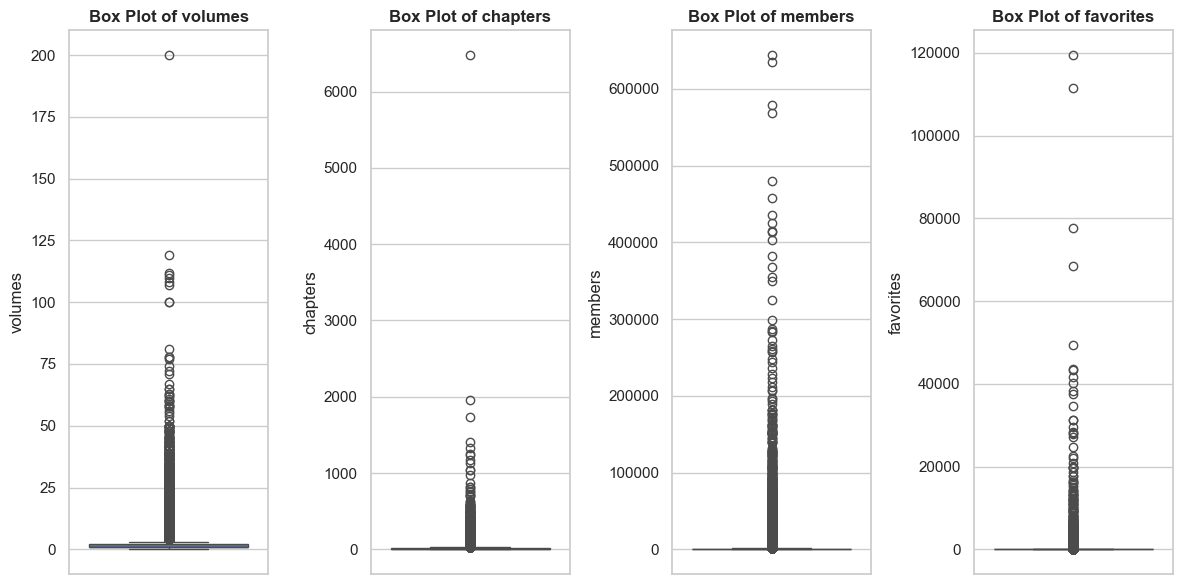

In [36]:
import seaborn as sns

numerical_columns = mangaCsv.select_dtypes(include=['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 6))
sns.set(style="whitegrid") 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=mangaCsv[column])
    plt.title(f'Box Plot of {column}', fontweight='bold')

plt.tight_layout()
plt.show()

Based on the above box plots:
1. **Volumes**: The distribution is right-skewed with many manga having few volumes and a small number having many volumes, indicating a few exceptionally long series.
2. **Chapters**: This distribution is also right-skewed. Most manga have fewer chapters, but a few outliers indicate some series are significantly longer.
3. **Members**: Less skewed than volumes or chapters, showing a broad range of popularity levels among manga, with some notable high outliers indicating extremely popular series.
4. **Favorites**: Similar to members, showing a wide range of favoritism with a few manga being exceptionally favored.

Overall, the boxplots reveal that while most manga series are shorter, a few outliers significantly skew the distributions of volumes and chapters. Popularity metrics like members and favorites also show a wide range but include some highly popular outliers.

Logarithmic transformation reduces skewness and outlier effects in data, making distributions more symmetrical and linear relationships clearer. This simplifies analysis and enhances the accuracy of statistical models.

Applying logarithmic transformation

In [37]:
mangaCsv['volumes'] = mangaCsv['volumes'].replace(0, 1)
mangaCsv['chapters'] = mangaCsv['chapters'].replace(0, 1)

mangaCsv['log_volumes'] = np.log1p(mangaCsv['volumes'])
mangaCsv['log_chapters'] = np.log1p(mangaCsv['chapters'])

print(mangaCsv[['log_volumes', 'log_chapters']].head())

   log_volumes  log_chapters
0     0.693147      0.693147
1     0.693147      0.693147
2     3.218876      4.574711
3     2.639057      4.997212
4     3.332205      4.762174


In [38]:
mangaCsv['members'] = mangaCsv['members'].replace(0, 1)
mangaCsv['favorites'] = mangaCsv['favorites'].replace(0, 1)

mangaCsv['log_members'] = np.log1p(mangaCsv['members'])
mangaCsv['log_favorites'] = np.log1p(mangaCsv['favorites'])

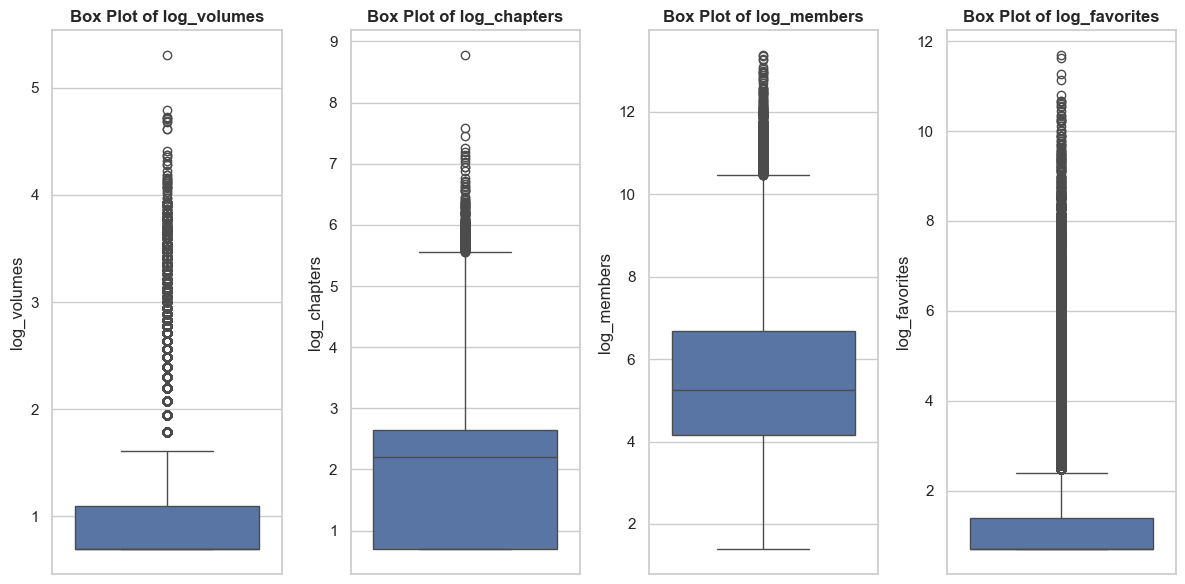

In [39]:
import seaborn as sns
columns_log = mangaCsv[['log_volumes', 'log_chapters', 'log_members', 'log_favorites']]

num_cols = 5
num_rows = (len(columns_log) + num_cols - 1) // num_cols
num_rows = 1 
plt.figure(figsize=(15, num_rows * 6))
sns.set(style="whitegrid") 

for i, column in enumerate(columns_log, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=mangaCsv[column])
    plt.title(f'Box Plot of {column}',fontweight='bold')

plt.tight_layout()
plt.show()

The logarithmic transformation of the manga dataset has effectively moderated the skewness and reduced the impact of outliers, as shown in the transformed box plots:

1. **Log_Volumes**: The distribution still shows a concentration at lower values but the range of outliers has been significantly compressed, making the data more manageable.

2. **Log_Chapters**: The transformation has standardized the spread between the quartiles, indicating a more normalized distribution. Outliers are still present but less pronounced.

3. **Log_Members**: This variable now shows a much cleaner, nearly symmetrical distribution with a reduced range of extreme values. This is indicative of a more standardized level of popularity among manga.

4. **Log_Favorites**: The distribution is also more symmetrical and tighter, with fewer extreme outliers compared to the original favorites data.

These transformations have clarified the underlying trends and variabilities in the data, improving the robustness of statistical analyses and interpretations.

Keeping the outliers after log transformation since they are less extreme but still present, it indicates they might be significant data points rather than errors or noise.

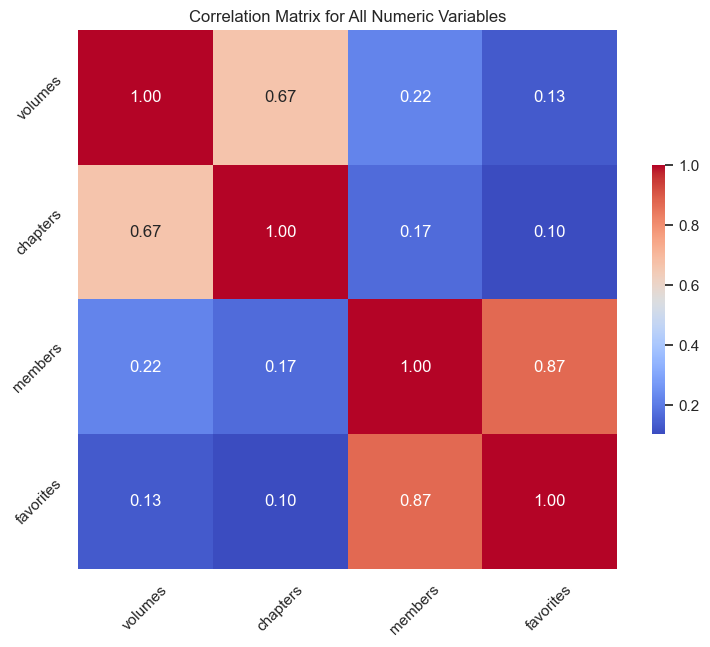

In [40]:
corr_matrix = mangaCsv[numerical_columns].corr()
plt.figure(figsize=(9, 7))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for All Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

The correlation matrix shows:
1. **Strong Link Between Volumes and Chapters**: A significant positive correlation (0.67) indicates that longer manga series, with more volumes, generally have more chapters.
2. **High Correlation Between Members and Favorites**: A very high correlation (0.87) suggests that more popular manga, with many members, also tend to be highly favored.
3. **Low Influence of Manga Length on Popularity**: Both volumes and chapters have weak correlations with the number of members and favorites, indicating that a manga’s length does not strongly impact its popularity or favoritism.

In [41]:
genres = mangaCsv['genres'].nunique()
type = mangaCsv['type'].nunique()

print(f"Number of unique categories in genres: {genres}")
print(f"Number of unique categories in type: {type}")

Number of unique categories in genres: 1788
Number of unique categories in type: 7


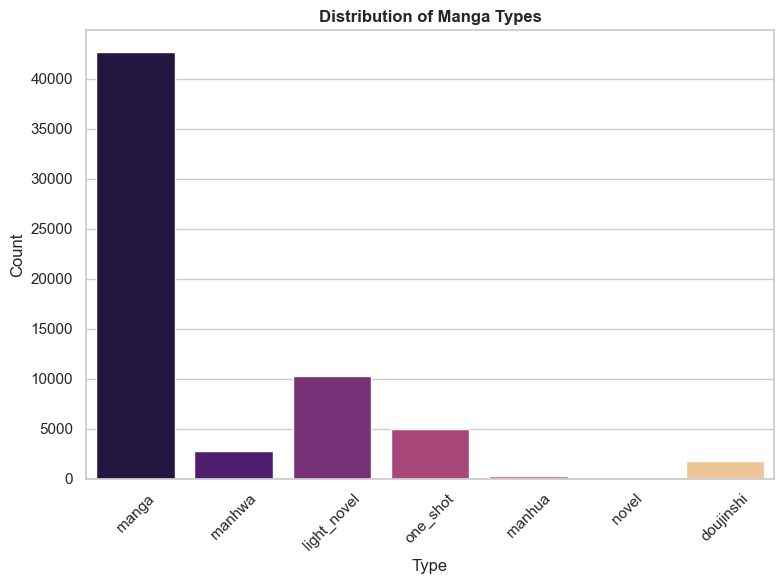

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(data=mangaCsv, x='type', hue='type', palette='magma')
plt.title('Distribution of Manga Types', fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.show()

The bar chart illustrates the distribution of different types of manga in your dataset:
1. **Manga**: Dominates the dataset with the highest count, significantly more prevalent than any other type.
2. **Manhwa**: The second most common type, but with a much lower count compared to manga.
3. **Light Novel**: Also a notable category, though far less common than manga or manhwa.
4. **One-shot**: Represents a smaller segment within the dataset.
5. **Manhua**, **Novel**, and **Doujinshi**: These types have very few counts, indicating they are relatively rare in your dataset.

This distribution highlights the predominance of traditional manga and shows a varied representation of other manga-related formats, with some being quite minor in comparison.

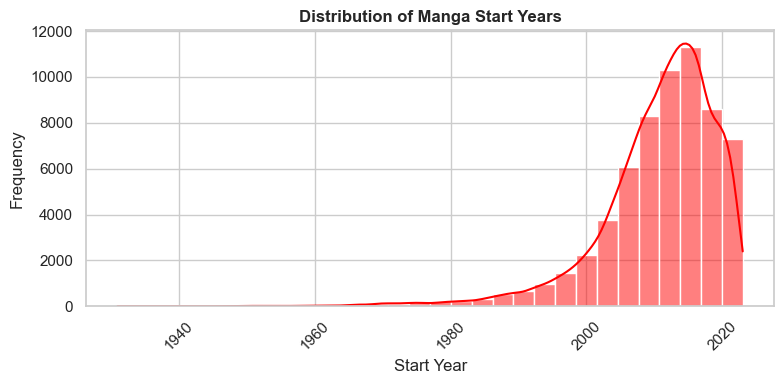

In [45]:
plt.figure(figsize=(8,4))
sns.histplot(data=mangaCsv, x='start_year', bins=30, kde=True, color='red')
plt.title('Distribution of Manga Start Years', fontweight='bold')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)  
plt.tight_layout()  
plt.show()

The histogram of manga start years shows a clear trend in the popularity and production of manga over time:

1. **Gradual Increase**: The frequency of manga publications gradually increased from the 1940s, picking up significantly around the 1980s.
2. **Peak Popularity**: Manga saw a sharp rise in publications starting in the late 1990s, reaching a peak around the late 2000s and early 2010s.
3. **Recent Decline**: After the peak, there is a noticeable decline in new manga starts in the 2010s, continuing into the early 2020s.

This pattern suggests a boom in manga production aligning with growing global interest and market expansion in the late 20th and early 21st centuries, followed by a recent downtrend, possibly due to market saturation or shifts in media consumption.

### Categorical Variables counts

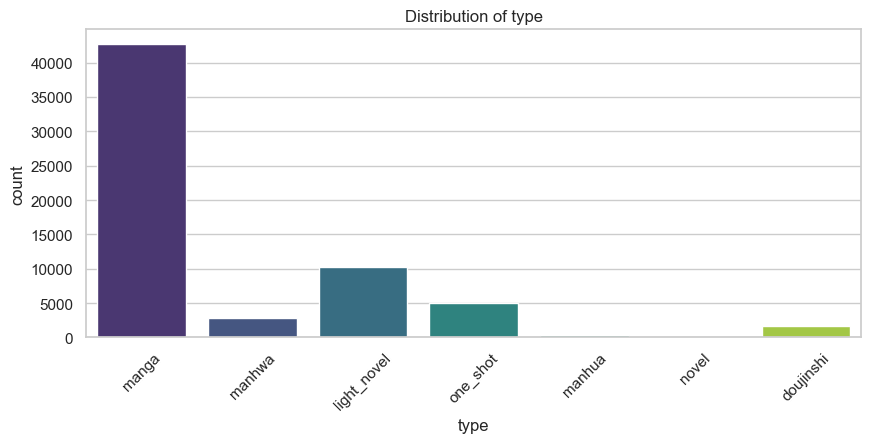

Counts for type:
type
manga          42704
light_novel    10217
one_shot        4977
manhwa          2789
doujinshi       1736
manhua           304
novel            132
Name: count, dtype: int64



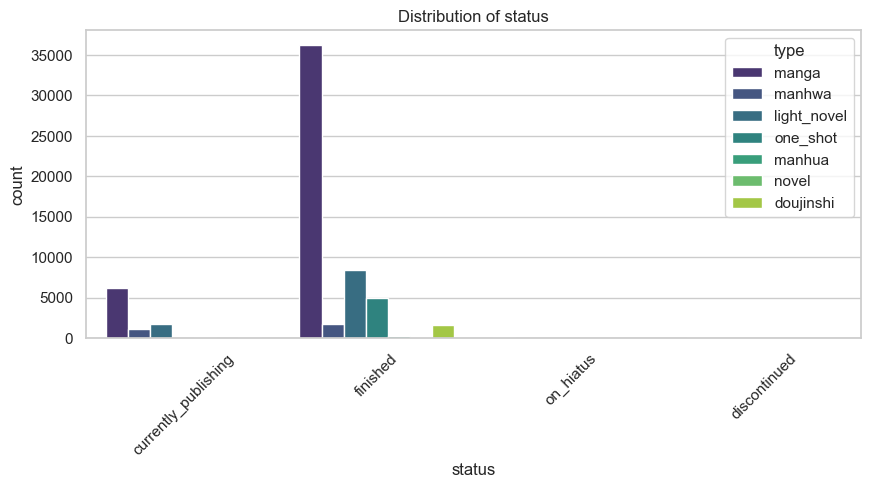

Counts for status:
status
finished                53216
currently_publishing     9340
on_hiatus                 207
discontinued               96
Name: count, dtype: int64



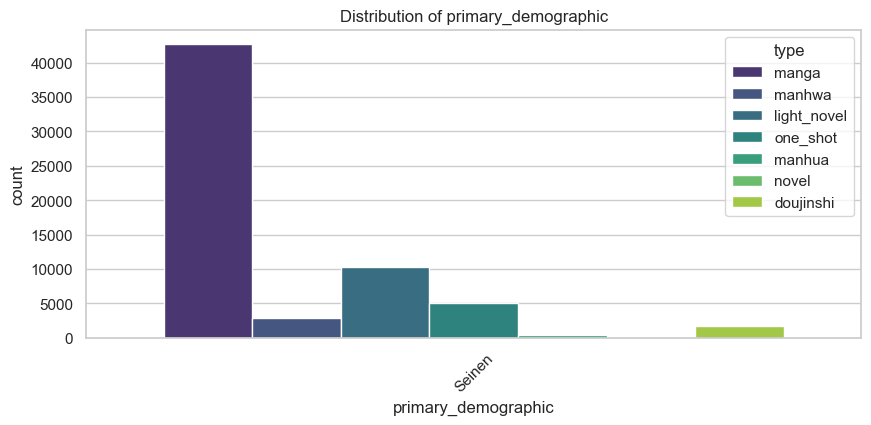

Counts for primary_demographic:
primary_demographic
Seinen    62859
Name: count, dtype: int64



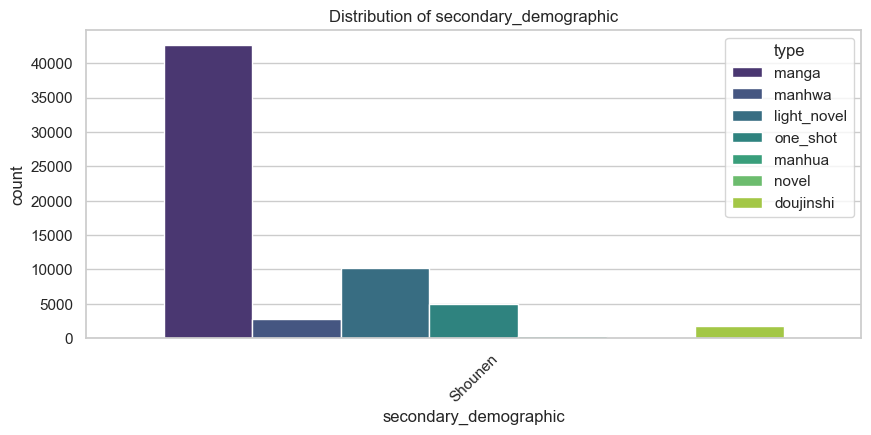

Counts for secondary_demographic:
secondary_demographic
Shounen    62859
Name: count, dtype: int64



In [51]:
categorical_vars = ['type', 'status', 'primary_demographic', 'secondary_demographic']
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=mangaCsv, x=var, hue='type',palette='viridis')
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

    # Print counts
    print(f"Counts for {var}:\n{mangaCsv[var].value_counts()}\n")

### Text and Author Analysis

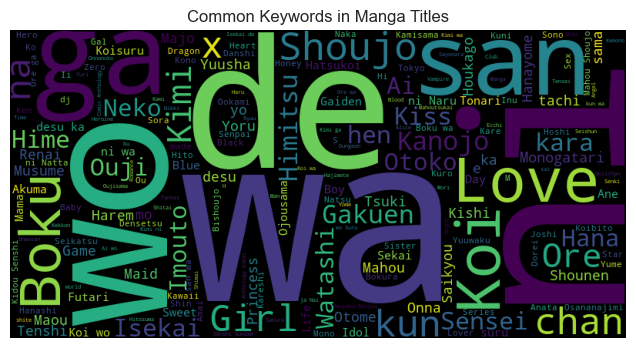

                  members  favorites
author_names                        
Hirohiko Araki    1238000      83035
Takeshi Obata     1021883      50828
Tatsuki Fujimoto   962225      91978
Sui Ishida         857726      67876
Inio Asano         839087      60718
Naoki Urasawa      775267      46677
Junji Itou         759393      22191
Kentarou Miura     700289     119735
Eiichiro Oda       662057     111933
Hajime Isayama     648775      68715


In [67]:
from wordcloud import WordCloud

# Common keywords in titles
title_words = ' '.join(mangaCsv['title'])
wordcloud = WordCloud(width=800, height=400).generate(title_words)
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Common Keywords in Manga Titles')
plt.show()

# Analyzing author impact
author_group = mangaCsv.groupby('author_names').agg({'members': 'sum', 'favorites': 'sum'}).nlargest(10, 'members')
print(author_group)

(-0.5, 799.5, 399.5, -0.5)

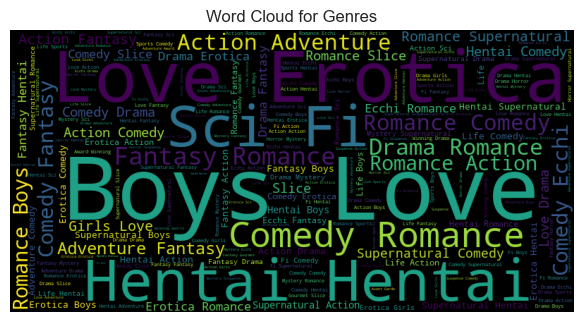

In [61]:
# Word clouds for genres and themes
genre_words = ' '.join(mangaCsv['genres'].dropna())

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
wordcloud = WordCloud(width=800, height=400).generate(genre_words)
plt.imshow(wordcloud)
plt.title('Word Cloud for Genres')
plt.axis('off')



In [63]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

genre_list = mangaCsv['genres'].dropna().apply(lambda x: x.split(', '))
te = TransactionEncoder()
te_ary = te.fit(genre_list).transform(genre_list)
genre_df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(genre_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
print(rules)


Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
Index: []


In [633]:
import pandas as pd
from scipy.stats import ttest_ind


high_popularity = mangaCsv[mangaCsv['members'] > mangaCsv['members'].quantile(0.75)]  # Top 25% of popularity
low_popularity = mangaCsv[mangaCsv['members'] <= mangaCsv['members'].quantile(0.25)]  # Bottom 25% of popularity

high_popularity = high_popularity.dropna(subset=['chapters'])
low_popularity = low_popularity.dropna(subset=['chapters'])

t_statistic, p_value = ttest_ind(high_popularity['chapters'], low_popularity['chapters'], equal_var=False)

alpha = 0.05

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of chapters between high and low popularity anime.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of chapters between high and low popularity anime.")


T-statistic: 34.35599267522518
P-value: 2.0245576240364444e-251
Reject the null hypothesis. There is a significant difference in the average number of chapters between high and low popularity anime.


This result suggests that there is a statistically significant disparity in the average number of chapters between manga with high popularity and those with low popularity.

### ANOVA test to check impact of manga type on members

In [71]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('members ~ C(type)', data=mangaCsv).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                sum_sq       df         F        PR(>F)
C(type)   4.044455e+10      6.0  53.50151  3.820722e-66
Residual  7.918844e+12  62852.0       NaN           NaN


- **Significance**: The extremely small p-value (far less than any conventional significance level like 0.01 or 0.05) strongly suggests that there are significant differences in the number of members across different types of manga. This means that the type of manga is a significant factor in determining its popularity.
- **Effect Size**: The ratio of the sum of squares between groups to the total sum of squares indicates the effect size, showing how much of the variance in the number of members can be explained by the type of manga.

Given the significant F-value and extremely low p-value, we reject the null hypothesis that all types of manga have the same average number of members. This suggests that some types of manga are more popular than others.


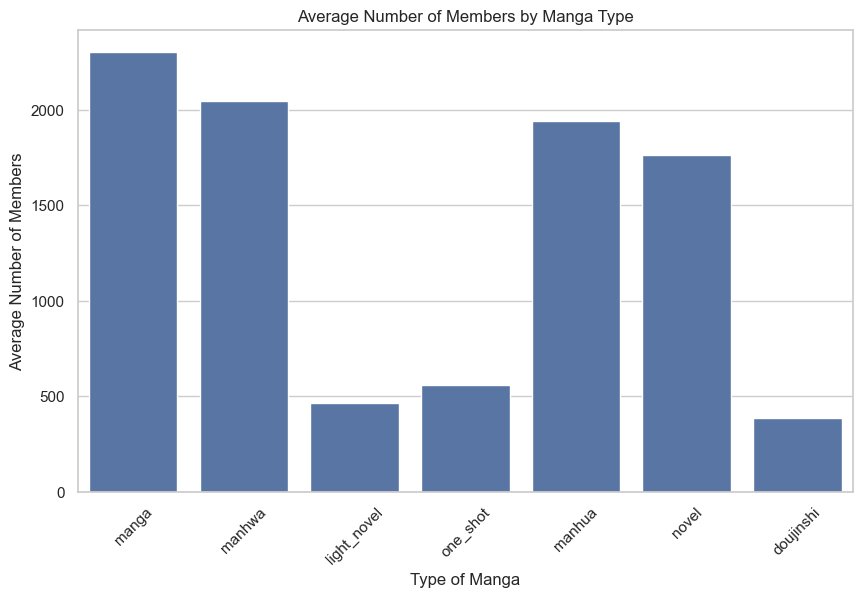

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='members', data=mangaCsv, errorbar=None)
plt.title('Average Number of Members by Manga Type')
plt.xlabel('Type of Manga')
plt.ylabel('Average Number of Members')
plt.xticks(rotation=45)
plt.show()

### Insights from the Chart:
1. **High Popularity**: Manga and Manhwa types demonstrate the highest popularity, with Manhua and Novels also showing relatively high average membership. This suggests that these formats have a broad appeal or are possibly better promoted or more widely available.
   
2. **Moderate to Low Popularity**:
   - Light novels and one-shots have moderate levels of popularity. One-shots, being standalone stories, might not engage readers enough to gain a high number of members.
   - Doujinshi, typically being self-published works, show the lowest popularity. This could be due to less exposure and limited distribution channels compared to commercial works.

### Correlation between Log Transformed Chapters and Favorites

In [72]:
correlation = mangaCsv['log_chapters'].corr(mangaCsv['log_favorites'])
print(f"Correlation between log-transformed chapters and favorites: {correlation}")

Correlation between log-transformed chapters and favorites: 0.2382899312905934
